In [1]:
#pip install pytrends
!pip install us

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pytrends.request import TrendReq
import us
import datetime
pytrends = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)

In [3]:
#CSV CLEANING PROCESS

# yeezycsvpath="Resources/StockX-Data-Contest-2019-csv.csv"
# yeezydata = pd.read_csv(yeezycsvpath)

In [4]:
#change prices from string to int
# yeezydata['Sale Price'] = yeezydata['Sale Price'].str.replace(',', '')
# yeezydata['Sale Price'] = yeezydata['Sale Price'].str.replace('$', '')
# yeezydata['Sale Price'] = yeezydata['Sale Price'].astype(int)


# yeezydata['Retail Price'] = yeezydata['Retail Price'].str.replace(',', '')
# yeezydata['Retail Price'] = yeezydata['Retail Price'].str.replace('$', '')
# yeezydata['Retail Price'] = yeezydata['Retail Price'].astype(int)

# #change dates from string to datetime
# yeezydata['Order Date'] = pd.to_datetime(yeezydata['Order Date'], format = '%m/%d/%y')
# yeezydata['Release Date'] = pd.to_datetime(yeezydata['Release Date'], format = '%m/%d/%y')

# #remove extra columns, strip extra spaces
# yeezydata = yeezydata.drop(columns = "Unnamed: 0")
# yeezydata['Brand'] = yeezydata['Brand'].str.strip()

In [5]:
#Add profit margin and days since launch to main dataframe
# yeezydata["Profit Margin ($)"] = yeezydata['Sale Price'] - yeezydata['Retail Price']
# yeezydata["Profit %"] = yeezydata["Profit Margin ($)"]/yeezydata['Retail Price'] * 100
# yeezydata["Days Since Launch"] = yeezydata['Order Date'] - yeezydata['Release Date']
# yeezydata["Days Since Launch"] = yeezydata["Days Since Launch"].dt.days
# yeezydata["State"] = ""

# for index, row in yeezydata.iterrows():
#     state = row["Buyer Region"]
#     st = us.states.lookup(state)
    
#     try: 
#         yeezydata.loc[index, "State"] = st.abbr
#     except AttributeError:
#         print(st)
#         pass

#Add year and week of year info
# yeezydata['Year'] = yeezydata['Order Date'].dt.year
# yeezydata['Week Number'] = yeezydata['Order Date'].dt.week

# yeezydata.to_csv("Clean StockX Data.csv")

In [6]:
#load cleaned csv
yeezycsvpath="Resources/Even Cleaner StockX Data.csv"
yeezydata = pd.read_csv(yeezycsvpath)

#convert date strings to datetime
yeezydata['Order Date'] = pd.to_datetime(yeezydata['Order Date'])
yeezydata['Release Date'] = pd.to_datetime(yeezydata['Release Date'])

#preview data
yeezydata.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type,Profit Margin ($),Profit %,Days Since Launch,State,Year,Week Number,Google Trend Score (State),Google Trend Score (National)
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,Yeezy Boost 350 V2,877,398.636364,342,CA,2017,35,24,28
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,465,211.363636,282,CA,2017,35,24,28
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,470,213.636364,282,CA,2017,35,24,28
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,Yeezy Boost 350 V2,855,388.636364,282,KY,2017,35,34,28
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island,Yeezy Boost 350 V2,608,276.363636,202,RI,2017,35,21,28


In [7]:
#Sort values by sneaker name and buyer region
sortbyregion=yeezydata.sort_values(by=['Sneaker Name','Buyer Region'])
sortbyregion

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type,Profit Margin ($),Profit %,Days Since Launch,State,Year,Week Number,Google Trend Score (State),Google Trend Score (National)
57968,2018-01-11,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,801,200,2015-11-14,12.5,Arizona,Yeezy Boost 350,601,300.500000,1083,AZ,2018,44,41,37
75259,2018-12-16,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,830,200,2015-11-14,11.0,Arkansas,Yeezy Boost 350,630,315.000000,1128,AR,2018,50,89,52
764,2017-04-10,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,1000,200,2015-11-14,7.0,California,Yeezy Boost 350,800,400.000000,690,CA,2017,40,21,27
903,2017-12-10,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,1250,200,2015-11-14,6.5,California,Yeezy Boost 350,1050,525.000000,698,CA,2017,41,24,27
1086,2017-10-16,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,1037,200,2015-11-14,10.5,California,Yeezy Boost 350,837,418.500000,702,CA,2017,42,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89511,2019-01-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,447,220,2018-12-26,9.5,Wisconsin,Yeezy Boost 350 V2,227,103.181818,18,WI,2019,2,16,31
90485,2019-01-16,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,450,220,2018-12-26,8.5,Wisconsin,Yeezy Boost 350 V2,230,104.545455,21,WI,2019,3,24,29
90782,2019-01-17,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,494,220,2018-12-26,5.0,Wisconsin,Yeezy Boost 350 V2,274,124.545454,22,WI,2019,3,24,29
93267,2019-01-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,470,220,2018-12-26,9.5,Wisconsin,Yeezy Boost 350 V2,250,113.636364,31,WI,2019,4,25,27


In [8]:
#sell through data organzied by shoe name, then ascending shoe size, and then sale price
sortbysaleprice=yeezydata.sort_values(by=['Sneaker Name','Sale Price','Shoe Size'])
sortbysaleprice

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type,Profit Margin ($),Profit %,Days Since Launch,State,Year,Week Number,Google Trend Score (State),Google Trend Score (National)
63929,2018-11-23,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,730,200,2015-11-14,6.0,California,Yeezy Boost 350,530,265.000000,1105,CA,2018,47,54,61
95592,2019-05-02,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,740,200,2015-11-14,7.0,Florida,Yeezy Boost 350,540,270.000000,1179,FL,2019,6,22,25
73008,2018-12-12,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,745,200,2015-11-14,7.5,Florida,Yeezy Boost 350,545,272.500000,1124,FL,2018,50,47,52
90497,2019-01-17,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,760,200,2015-11-14,10.0,Florida,Yeezy Boost 350,560,280.000000,1160,FL,2019,3,24,29
71558,2018-08-12,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,760,200,2015-11-14,11.5,New Jersey,Yeezy Boost 350,560,280.000000,1120,NJ,2018,49,64,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79451,2018-12-24,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,1200,220,2018-12-26,11.0,Texas,Yeezy Boost 350 V2,980,445.454545,-2,TX,2018,52,44,44
78757,2018-12-22,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,1350,220,2018-12-26,12.0,New York,Yeezy Boost 350 V2,1130,513.636364,-4,NY,2018,51,100,100
79095,2018-12-23,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,1350,220,2018-12-26,13.0,California,Yeezy Boost 350 V2,1130,513.636364,-3,CA,2018,51,89,100
79450,2018-12-24,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,1850,220,2018-12-26,13.0,Georgia,Yeezy Boost 350 V2,1630,740.909091,-2,GA,2018,52,42,44


In [9]:
#number of shoes per brand in source data
brandgroup = yeezydata.groupby("Brand")
brandgroup["Sneaker Name"].nunique()

Brand
Off-White    30
Yeezy        20
Name: Sneaker Name, dtype: int64

In [10]:
#name of shoes and units sold per shoe, amount of different shoes being sold. 
shoename=yeezydata["Sneaker Name"].value_counts()
print(shoename)
print(len(shoename))

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3183
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black                     13

In [11]:
#total units sold per snaker name and size
regionsales=yeezydata['Buyer Region'].value_counts()
regionsales

California              19348
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

In [12]:
#sales per state by shoe
stategroup = yeezydata.groupby('Buyer Region')
stategroup['Sneaker Name'].value_counts()

Buyer Region  Sneaker Name                                 
Alabama       Adidas-Yeezy-Boost-350-V2-Zebra                  71
              Adidas-Yeezy-Boost-350-V2-Cream-White            51
              adidas-Yeezy-Boost-350-V2-Butter                 48
              Adidas-Yeezy-Boost-350-V2-Beluga-2pt0            47
              Adidas-Yeezy-Boost-350-V2-Blue-Tint              47
                                                               ..
Wyoming       Adidas-Yeezy-Boost-350-V2-Sesame                  2
              adidas-Yeezy-Boost-350-V2-Static                  2
              Adidas-Yeezy-Boost-350-V2-Core-Black-Red          1
              Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017     1
              Nike-Air-Max-97-Off-White-Black                   1
Name: Sneaker Name, Length: 2011, dtype: int64

In [13]:
#shoe sales by shoe name and shoe size
shoetypesize = yeezydata.groupby(['Sneaker Name', 'Shoe Size'])

totalunits = shoetypesize['Sneaker Name'].count()
avgsale = shoetypesize['Sale Price'].mean()
avgretail = shoetypesize['Retail Price'].mean()
avgprofits = shoetypesize['Profit Margin ($)'].mean()
profitpercent = (avgprofits/avgretail) * 100


shoesalessummary_df = pd.DataFrame({"Total Units Sold": totalunits,
                                    "Average Sale Price": avgsale,
                                    "Average Retail Price": avgretail,
                                    "Average Profit Margin per Shoe": avgprofits,
                                    "Profit %": profitpercent})

shoesalessummary_df.style.format({"Average Sale Price": '${:.2f}',
                                  "Average Retail Price": '${:.2f}',
                                  "Average Profit Margin per Shoe": '${:.2f}',
                                  "Profit %": '{:.1f}%'})

In [14]:
#shoe sales by shoe name
shoetype = yeezydata.groupby('Sneaker Name')

totalunits2 = shoetype['Sneaker Name'].count()
avgsale2 = shoetype['Sale Price'].mean()
avgretail2 = shoetype['Retail Price'].mean()
avgprofits2 = shoetype['Profit Margin ($)'].mean()
profitpercent2 = (avgprofits2/avgretail2) * 100
avgdayssincelaunch = shoetype['Days Since Launch'].mean()

shoesalessummary2_df = pd.DataFrame({"Total Units Sold": totalunits2,
                                    "Average Sale Price": avgsale2,
                                    "Average Retail Price": avgretail2,
                                    "Average Profit Margin per Unit": avgprofits2,
                                    "Average Profit %": profitpercent2,
                                    "Days Since Launch": avgdayssincelaunch})

shoesalessummary2_df.sort_values(by=['Average Profit %'], ascending = False).style.format({"Average Sale Price": '${:.2f}',
                                                                                   "Average Retail Price": '${:.2f}',
                                                                                   "Average Profit Margin per Unit": '${:.2f}',
                                                                                   "Average Profit %": '{:.1f}%',
                                                                                   "Days Since Launch": '{:.1f}'})

,Total Units Sold,Average Sale Price,Average Retail Price,Average Profit Margin per Unit,Average Profit %,Days Since Launch
Sneaker Name,,,,,,
Air-Jordan-1-Retro-High-Off-White-White,313,$1826.07,$190.00,$1636.07,861.1%,81.4
Air-Jordan-1-Retro-High-Off-White-Chicago,755,$1769.80,$190.00,$1579.80,831.5%,179.9
Nike-Air-Presto-Off-White,596,$1236.06,$160.00,$1076.06,672.5%,159.0
Adidas-Yeezy-Boost-350-Low-Turtledove,68,$1531.66,$200.00,$1331.66,665.8%,1097.3
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,31,$975.52,$150.00,$825.52,550.3%,47.0
Nike-Blazer-Mid-Off-White-Wolf-Grey,288,$784.82,$130.00,$654.82,503.7%,80.0
Nike-Blazer-Mid-Off-White,501,$695.48,$130.00,$565.48,435.0%,138.5
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70,$1011.51,$200.00,$811.51,405.8%,905.8
Adidas-Yeezy-Boost-350-Low-Moonrock,100,$996.71,$200.00,$796.71,398.4%,947.9


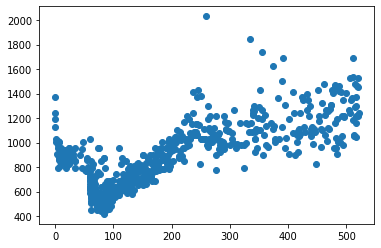

In [15]:
#graph of profits vs days since launch before sale
plt.scatter(x = yeezydata.loc[yeezydata["Sneaker Name"] == "Air-Jordan-1-Retro-High-Off-White-Chicago", "Days Since Launch"], y = yeezydata.loc[yeezydata["Sneaker Name"] == "Air-Jordan-1-Retro-High-Off-White-Chicago", "Profit %"])

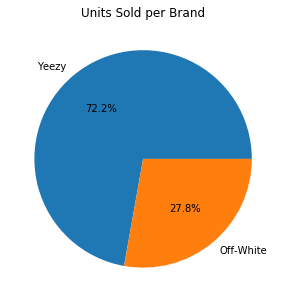

In [16]:
#units sold per brand
shoebrands = yeezydata["Brand"].unique()
shoessold = yeezydata["Brand"].value_counts()

fig1, ax1 = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
plt.pie(shoessold, labels = shoebrands, autopct='%1.1f%%')
ax1.set_title("Units Sold per Brand")

# Save the figure
plt.savefig("Units_sold_per_brand.png")

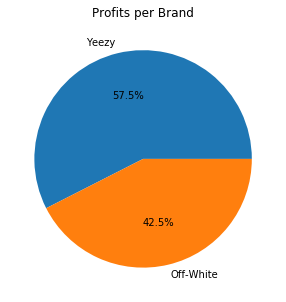

In [17]:
#profits per brand
profits = yeezydata.groupby("Brand")["Profit Margin ($)"].sum()

fig2, ax2 = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

plt.pie(profits, labels = shoebrands, autopct='%1.1f%%')
ax2.set_title("Profits per Brand")

# Save the figure
plt.savefig("Profits_per_brand.png")

In [18]:
# construct google trend API search for national data

#yeezy
# kw = ['Yeezy']
# pytrends.build_payload(kw_list=kw, cat=0, timeframe='2017-09-01 2019-02-17', geo='US', gprop='')
# yeezy_trend_df=pytrends.interest_over_time()
# yeezy_trend_df = yeezy_trend_df.reset_index()
# yeezy_trend_df = yeezy_trend_df.drop(columns = "isPartial")
# yeezy_trend_df["date"] = pd.to_datetime(yeezy_trend_df["date"])

#off-white
# kw = ['Off-White']
# pytrends.build_payload(kw_list=kw, cat=0, timeframe='2017-09-01 2019-02-17', geo='US', gprop='')
# offwhite_trend_df=pytrends.interest_over_time()
# offwhite_trend_df = offwhite_trend_df.reset_index()
# offwhite_trend_df = offwhite_trend_df.drop(columns = "isPartial")
# offwhite_trend_df["date"] = pd.to_datetime(offwhite_trend_df["date"])

#merge both
# national_trend_df = yeezy_trend_df.merge(offwhite_trend_df, on="date")

#formatting
# national_trend_df['Year'] = national_trend_df['date'].dt.year
# national_trend_df['Week Number'] = national_trend_df['date'].dt.week
# national_trend_df.head()

In [19]:
#add google trend data (national) to yeezydata
# yeezydata["Google Trend Score (National)"] = ""

# for index, row in yeezydata.iterrows():
#     year = row["Year"]
#     week = row["Week Number"]
#     brand = row["Brand"]
  
#     try:
#         yeezydata.loc[index, "Google Trend Score (National)"] = national_trend_df.loc[(national_trend_df["Year"] == year) & (national_trend_df["Week Number"] == week), brand].values[0]
    
#     except IndexError:
#         print(index)
#         pass

In [20]:
# construct google trend API search for each state

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
#yeezy
# kw = ['Yeezy']
# yeezy_trends={}

# for state in states:
#     state_search="US-"+ state
    
#     pytrends.build_payload(kw_list=kw, cat=0, timeframe='2017-09-01 2019-02-17', geo=state_search, gprop='')
#     state_df = pytrends.interest_over_time()
#     state_df = state_df.reset_index()
#     yeezy_trends[state]=state_df

#off-white    
# kw = ['Off-White']
# offwhite_trends={}

# for state in states:
#     state_search="US-"+ state
    
#     pytrends.build_payload(kw_list=kw, cat=0, timeframe='2017-09-01 2019-02-17', geo=state_search, gprop='')
#     state_df = pytrends.interest_over_time()
#     state_df = state_df.reset_index()
#     offwhite_trends[state]=state_df

In [21]:
#state google trend data cleaning
# for state in states:

#     try:
#         yeezy_trends[state] = yeezy_trends[state].drop(columns = "isPartial")
#         print(f"Dropping Yeezy {state}")
   
#     except KeyError:
#         print(state)
#         pass
    
# for state in states:    
#     try:
#         offwhite_trends[state] = offwhite_trends[state].drop(columns = "isPartial")
#         print(f"Dropping Off-White {state}")
        
#     except KeyError:
#         print(state)
#         pass   

In [22]:
#merge and save to csv so we never have to API call again
# stateGoogleTrends={}
# for state in states:   
#     stateGoogleTrends[state] = yeezy_trends[state].merge(offwhite_trends[state], on = "date")
#     stateGoogleTrends[state]["Year"] = stateGoogleTrends[state]["date"].dt.year
#     stateGoogleTrends[state]["Week Number"] = stateGoogleTrends[state]["date"].dt.week
#     stateGoogleTrends[state] = stateGoogleTrends[state].drop(columns = ["Unnamed: 0_x", "Unnamed: 0_y"])
#     stateGoogleTrends[state].to_csv(f"Resources/State Google Trend Data/{state}.csv")

#load cleaned csv data
#     stategoogletrendspath = f"Resources/State Google Trend Data/{state}.csv"
#     stateGoogleTrends[state] = pd.read_csv(stategoogletrendspath)
#     stateGoogleTrends[state]["date"] = pd.to_datetime(stateGoogleTrends[state]["date"])
#     stateGoogleTrends[state] = stateGoogleTrends[state].drop(columns = "Unnamed: 0")
    
# stateGoogleTrends["CA"] 

In [23]:
#add google trend data (state) to yeezydata

# yeezydata["Google Trend Score (State)"] = ""

# for index, row in yeezydata.iterrows():
#     state = row["State"]
#     year = row["Year"]
#     week = row["Week Number"]
#     brand = row["Brand"]
  
#     try:
#         yeezydata.loc[index, "Google Trend Score (State)"] = stateGoogleTrends[state].loc[(stateGoogleTrends[state]["Year"] == year) & (stateGoogleTrends[state]["Week Number"] == week), brand].values[0]
    
#     except IndexError:
#         print(index)
#         pass

In [24]:
#shoe sales outliers, box plots

#Put shoe names into a list for use with a for loop (and later for plot labels)
sneakerlist = yeezydata["Sneaker Name"].unique()
# Create a empty list to fill with resell data (for plotting) (hint: each element of the list will be series)
resellprice = []
# For each shoe in the list, calculate the IQR and quantitatively
# determine if there are any potential outliers.
for shoe in sneakerlist:
    sales=yeezydata.loc[yeezydata["Sneaker Name"]==shoe, "Sale Price"]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    resellprice.append(sales)
    # add subset to tumor volume data list
    # Determine outliers using upper and lower bounds
    quartiles = sales.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# print(f”The lower quartile of volume is: {lowerq}“)
# print(f”The upper quartile of volume is: {upperq}“)
# print(f”The interquartile range of volume is: {iqr}“)
# print(f”The the median of volume is: {quartiles[0.5]} “)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f”Values below {lower_bound} could be outliers.“)
#     print(f”Values above {upper_bound} could be outliers.“)
    outliers=sales.loc[(sales<lower_bound) | (sales>upper_bound)]
    print (f'{shoe}potential outliers : {[outliers]}')
    

Adidas-Yeezy-Boost-350-Low-V2-Belugapotential outliers : [0        1097
205      1100
268      1139
374      1145
545      1155
697      1150
712      1130
735      1155
836      1090
1121     1111
10855    1490
17396    1111
17685    1250
Name: Sale Price, dtype: int64]
Adidas-Yeezy-Boost-350-V2-Core-Black-Copperpotential outliers : [869      1095
905       990
8608      900
19642     850
25118     850
62923     896
Name: Sale Price, dtype: int64]
Adidas-Yeezy-Boost-350-V2-Core-Black-Greenpotential outliers : [870      920
1166     810
46907    999
Name: Sale Price, dtype: int64]
Adidas-Yeezy-Boost-350-V2-Core-Black-Redpotential outliers : [208      1200
14318    1200
17557    1194
18191    1250
20291    1200
22933    1200
30079    1195
53999    1315
66114     675
67315     682
67837    1200
78369     650
79470    1575
Name: Sale Price, dtype: int64]
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017potential outliers : [303       998
329       975
548       941
682       946
716      1025

Nike-Zoom-Fly-Mercurial-Off-White-Blackpotential outliers : [29547    600
29683    580
29684    500
29687    455
29690    490
29813    425
29821    450
29822    430
29823    440
29824    423
29827    450
29836    440
29845    428
29846    420
30007    450
30011    440
30014    432
30020    435
30144    420
30156    425
30263    425
30493    430
31767    285
31769    275
32091    275
34695    265
35623    275
38635    250
39470    238
39659    420
40289    275
40678    265
43531    420
57885    256
58741    260
59134    285
59420    259
59852    270
60055    260
63545    420
87737    285
Name: Sale Price, dtype: int64]
Nike-Zoom-Fly-Mercurial-Off-White-Total-Orangepotential outliers : [29548    500
29696    360
29697    500
29698    460
29699    401
29700    428
29701    410
29702    400
29851    363
29853    387
29854    368
29855    357
29856    380
29857    365
29858    394
29860    394
29861    385
29862    395
29863    648
29865    377
29868    390
29869    385
29871    379
29872  

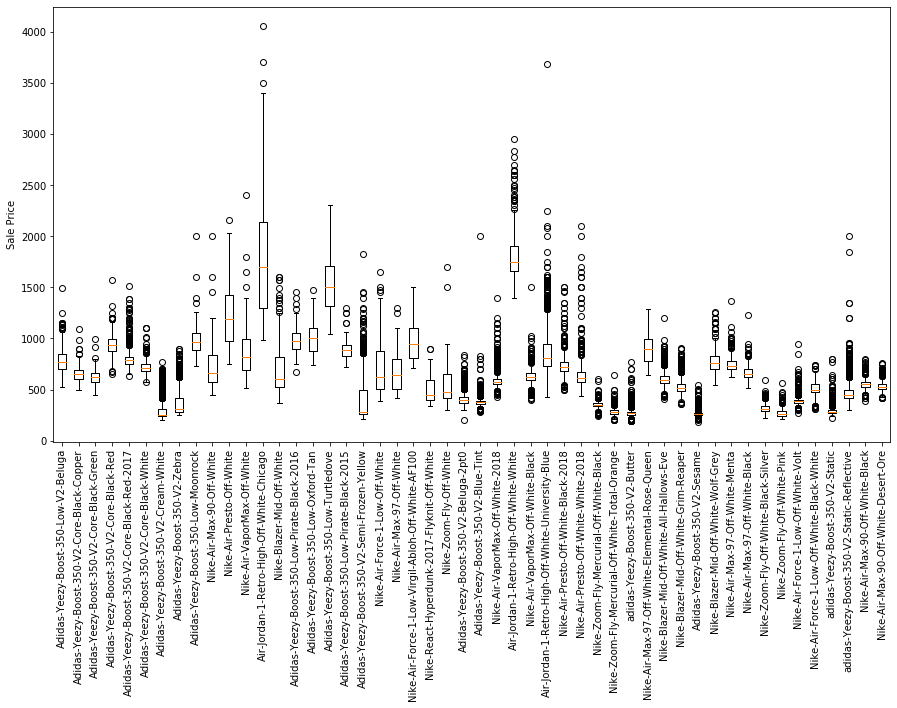

In [25]:
#graph box plots for sneaker names

fig1, ax1 = plt.subplots(figsize=(15,8))
#ax1.set_title()
ax1.set_ylabel('Sale Price')
ax1.boxplot(resellprice,labels=sneakerlist)
ax1.set_xticklabels(labels=sneakerlist, rotation=90)
plt.show()    

In [26]:
yeezydata

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type,Profit Margin ($),Profit %,Days Since Launch,State,Year,Week Number,Google Trend Score (State),Google Trend Score (National)
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,Yeezy Boost 350 V2,877,398.636364,342,CA,2017,35,24,28
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,465,211.363636,282,CA,2017,35,24,28
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,470,213.636364,282,CA,2017,35,24,28
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,Yeezy Boost 350 V2,855,388.636364,282,KY,2017,35,34,28
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island,Yeezy Boost 350 V2,608,276.363636,202,RI,2017,35,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,Yeezy Boost 350 V2,345,156.818182,49,OR,2019,7,42,32
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,Yeezy Boost 350 V2,378,171.818182,49,CA,2019,7,26,32
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,Yeezy Boost 350 V2,385,175.000000,49,NY,2019,7,33,32
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,Yeezy Boost 350 V2,430,195.454545,49,CA,2019,7,26,32


In [27]:
#shoe sales outliers by shoe type, box plots

#Put shoe types into a list for use with a for loop (and later for plot labels)
shoetypelist = yeezydata["Brand"].unique()
# Create a empty list to fill with resell data (for plotting) (hint: each element of the list will be series)
resellprice2 = []
# For each shoe in the list, calculate the IQR and quantitatively
# determine if there are any potential outliers.
for shoe in shoetypelist:
    sales2=yeezydata.loc[yeezydata["Brand"]==shoe, "Profit %"]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    resellprice2.append(sales2)
    # add subset to tumor volume data list
    # Determine outliers using upper and lower bounds
    quartiles2 = sales2.quantile([.25,.5,.75])
    lowerq2 = quartiles[0.25]
    upperq2 = quartiles[0.75]
    iqr2 = upperq2-lowerq2
# print(f”The lower quartile of volume is: {lowerq}“)
# print(f”The upper quartile of volume is: {upperq}“)
# print(f”The interquartile range of volume is: {iqr}“)
# print(f”The the median of volume is: {quartiles[0.5]} “)
    lower_bound2 = lowerq2 - (1.5*iqr2)
    upper_bound2 = upperq2 + (1.5*iqr2)
#     print(f”Values below {lower_bound} could be outliers.“)
#     print(f”Values above {upper_bound} could be outliers.“)
    outliers2=sales2.loc[(sales2<lower_bound2) | (sales2>upper_bound2)]
    print (f'{shoe}potential outliers : {[outliers2]}')
    

Yeezypotential outliers : [0        398.636364
1        211.363636
2        213.636364
3        388.636364
4        276.363636
            ...    
99950    156.818182
99951    171.818182
99952    175.000000
99953    195.454545
99954    190.909091
Name: Profit %, Length: 72009, dtype: float64]
Off-Whitepotential outliers : [128       900.000000
130       740.000000
131       728.125000
149      1189.473684
150      1123.684211
            ...     
99869      55.882353
99870      94.705882
99871     138.235294
99872      54.705882
99873      39.411765
Name: Profit %, Length: 25606, dtype: float64]


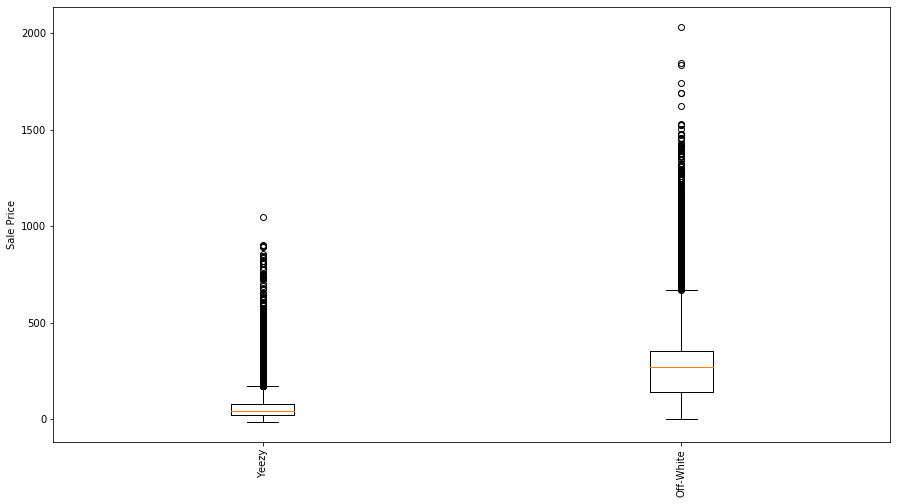

In [28]:
#graph box plots for shoe type

fig2, ax2 = plt.subplots(figsize=(15,8))
#ax1.set_title()
ax2.set_ylabel('Sale Price')
ax2.boxplot(resellprice2,labels=shoetypelist)
ax2.set_xticklabels(labels=shoetypelist, rotation = 90)
plt.show()    

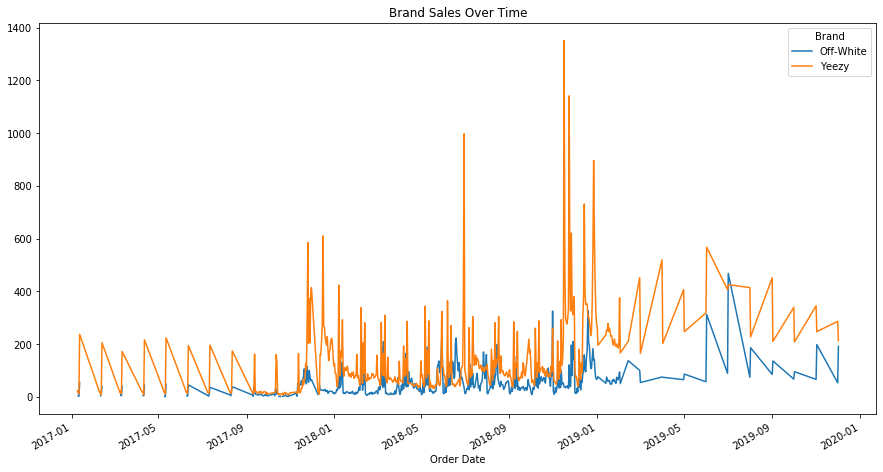

In [29]:
#sales by brand over time
fig, ax = plt.subplots(figsize=(15,8))
yeezydata.groupby(["Order Date", "Brand"])["Order Date"].count().unstack().plot(ax=ax)
ax.set_title("Brand Sales Over Time")

# Save the figure
plt.savefig("Brand_sales_over_time.png")

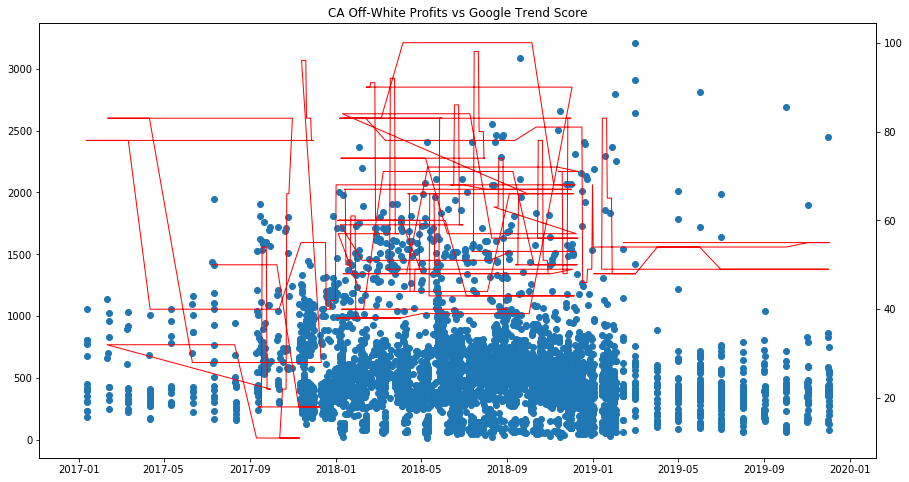

In [30]:
#graph shoe profits vs google trend score
CAyeezy = yeezydata.loc[(yeezydata["Brand"]=="Off-White") & (yeezydata["State"]=="CA"), :]
fig3, axA = plt.subplots(figsize=(15,8))
axB = axA.twinx()
axA.scatter(x = CAyeezy["Order Date"], y = CAyeezy["Profit Margin ($)"])
axB.plot(CAyeezy["Order Date"], CAyeezy["Google Trend Score (State)"], c = "red", linewidth=1)
axB.set_title("CA Off-White Profits vs Google Trend Score")
# Save the figure
plt.savefig("CA_offwhite_profits_v_GoogleTrends.png")
plt.show()    

In [31]:
yeezydata['Release Date'].value_counts()

2018-06-30    11423
2017-11-25    10395
2017-02-25    10110
2017-12-16     9297
2017-04-29     9097
2018-11-23     5553
2018-12-27     4983
2017-11-18     4854
2018-06-23     4635
2018-12-26     3183
2017-09-09     3004
2018-03-10     2833
2018-12-19     1979
2017-01-11     1939
2018-07-27     1884
2018-03-08     1883
2018-04-14     1591
2019-07-02     1371
2018-11-28     1359
2018-03-30     1313
2018-06-14     1301
2018-10-13     1222
2017-11-02      969
2016-11-23      723
2018-10-18      632
2016-12-17      621
2018-08-25      504
2016-09-24      498
2018-03-03      313
2016-02-19      122
2015-11-14      100
2015-08-22       95
2015-12-29       70
2015-06-27       68
2017-04-11       31
Name: Release Date, dtype: int64

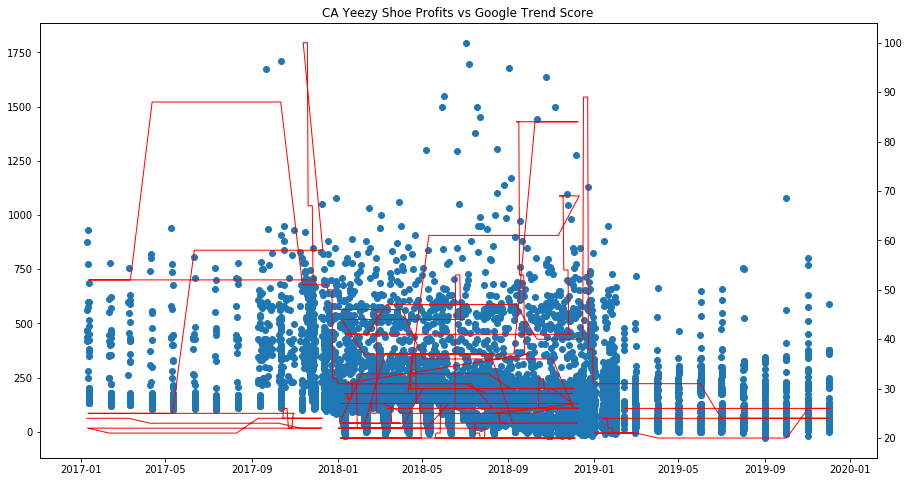

In [32]:
#graph shoe profits vs google trend score
CAyeezy = yeezydata.loc[(yeezydata["Brand"]=="Yeezy") & (yeezydata["State"]=="CA"), :]
fig3, axA = plt.subplots(figsize=(15,8))
axB = axA.twinx()
axA.scatter(x = CAyeezy["Order Date"], y = CAyeezy["Profit Margin ($)"])
axB.plot(CAyeezy["Order Date"], CAyeezy["Google Trend Score (State)"], c = "red", linewidth=1)
axA.set_title("CA Yeezy Shoe Profits vs Google Trend Score")
# Save the figure
plt.savefig("CA_yeezy_profits_v_GoogleTrends.png")
plt.show() 

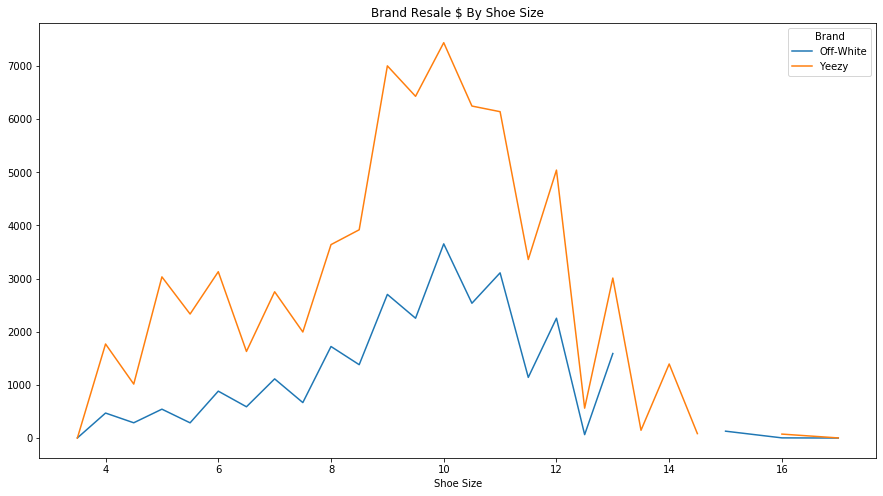

In [33]:
# Vizualization to show Resale $ by shoe size comparing the two brands
fig, ax = plt.subplots(figsize=(15,8))
yeezydata.groupby(["Shoe Size", "Brand"])["Sale Price"].count().unstack().plot(ax=ax)
ax.set_title("Brand Resale $ By Shoe Size")
# Save the figure
plt.savefig("Resale_value_vs_size.png")

In [34]:
yeezydata.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type,Profit Margin ($),Profit %,Days Since Launch,State,Year,Week Number,Google Trend Score (State),Google Trend Score (National)
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,Yeezy Boost 350 V2,877,398.636364,342,CA,2017,35,24,28
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,465,211.363636,282,CA,2017,35,24,28
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,Yeezy Boost 350 V2,470,213.636364,282,CA,2017,35,24,28
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,Yeezy Boost 350 V2,855,388.636364,282,KY,2017,35,34,28
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island,Yeezy Boost 350 V2,608,276.363636,202,RI,2017,35,21,28


In [36]:
#shoe sales by shoe name

#top profit %
totalunits2 = shoetype['Sneaker Name'].count()
totalsale3 = shoetype['Sale Price'].sum()
totalretail3 = shoetype['Retail Price'].sum()
totalprofit2 = totalsale2 - totalretail2
profitpercent2 = (totalsale3/totalretail3) * 100

shoesalessummary3_df = pd.DataFrame({"Total Units Sold": totalunits2,
                                    "Total Profits": totalprofit2,
                                    "Profit %": profitpercent2})

top5profitpercent = shoesalessummary3_df[shoesalessummary3_df["Profit %"] > 650]
top5profitpercent.sort_values(by=['Profit %'], ascending = False).style.format({"Total Profits": '${:,.2f}',
                                                                                    "Profit %": '{:,.1f}%'})
totalprofit2 = totalprofit2.sort_values(ascending = False)
totalprofit2.plot(kind = "bar")

NameError: name 'totalsale2' is not defined

In [37]:
#top profit dollars
top5profittotal = shoesalessummary3_df[shoesalessummary3_df["Total Profits"] > 1100000]
top5profittotal.sort_values(by=['Total Profits'], ascending = False).style.format({"Total Profits": '${:,.2f}',
                                                                                     "Profit %": '{:,.1f}%'})


NameError: name 'shoesalessummary3_df' is not defined

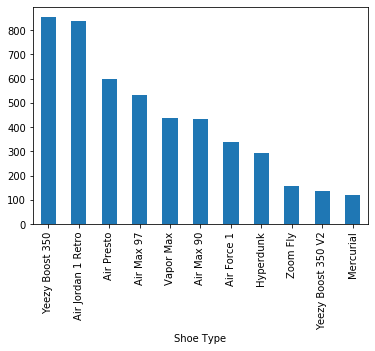

In [38]:
#shoe sales by shoe type
shoetype = yeezydata.groupby("Shoe Type")
typeprofits = shoetype["Profit Margin ($)"].mean()
typeprofits = typeprofits.sort_values(ascending = False)
typeprofits.plot(kind = "bar")

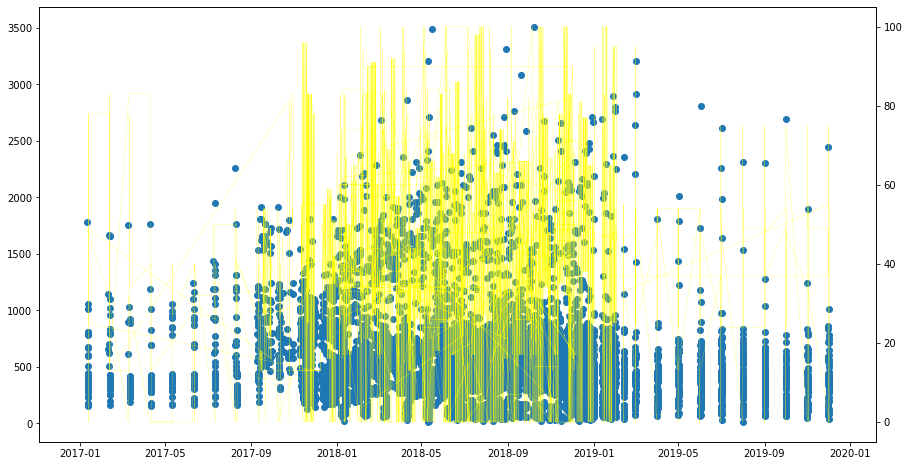

<Figure size 432x288 with 0 Axes>

In [39]:
newyeezy = yeezydata.loc[(yeezydata["Brand"]=="Off-White") & (yeezydata.State.isin(['CA', 'NY','OR', 'NJ','TX'])), :]
fig3, axA = plt.subplots(figsize=(15,8))
axB = axA.twinx()
axA.scatter(x = newyeezy["Order Date"], y = newyeezy["Profit Margin ($)"])
axB.plot(newyeezy["Order Date"], newyeezy["Google Trend Score (State)"], c = "yellow", linewidth=.2)
plt.show() 
plt.savefig('offwhitecorrelation.png')

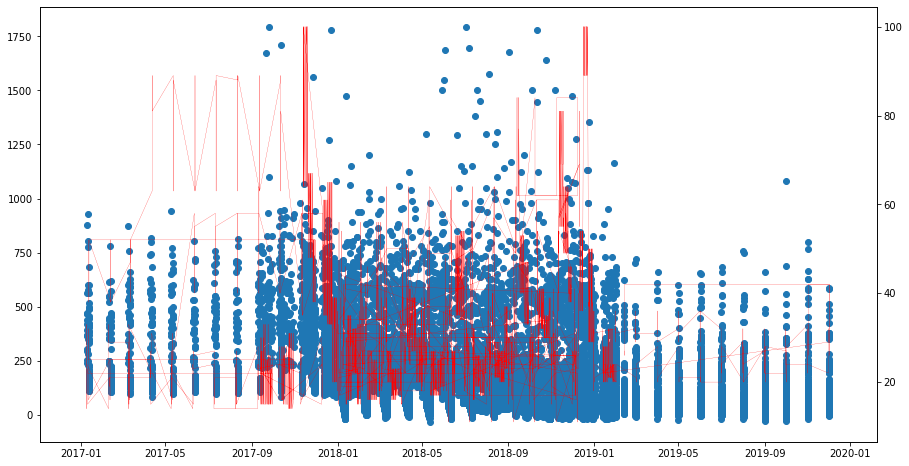

<Figure size 432x288 with 0 Axes>

In [40]:
# Vizualization to show Resale $ by shoe size comparing the two brands
newyeezy = yeezydata.loc[(yeezydata["Brand"]=="Yeezy") & (yeezydata.State.isin(['CA', 'NY','OR', 'NJ','TX'])), :]
fig3, axA = plt.subplots(figsize=(15,8))
axB = axA.twinx()
axA.scatter(x = newyeezy["Order Date"], y = newyeezy["Profit Margin ($)"])
axB.plot(newyeezy["Order Date"], newyeezy["Google Trend Score (State)"], c = "red", linewidth=.2)
plt.show() 
plt.savefig('yeezycorrelation.png')